In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [ ]:
print('y_train shape:', y_train.shape)


y_train shape: (50000, 1)


In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


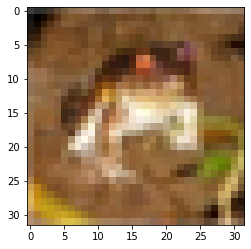

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

In [ ]:
print('The label is:', y_train[0])

The label is: [6]


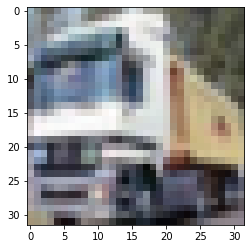

In [ ]:
img = plt.imshow(x_train[1])


In [ ]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
print('The one hot label is:', y_train_one_hot[1])


The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]


array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD


In [ ]:
# example of a 3-block vgg style architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:

# example output part of the model


In [ ]:
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train_one_hot, batch_size=16, epochs=500, validation_split=0.2)

Epoch 1/500
2500/2500 [==============================] - 18s 4ms/step - loss: 2.1737 - accuracy: 0.2019 - val_loss: 1.6625 - val_accuracy: 0.4139
Epoch 2/500
2500/2500 [==============================] - 10s 4ms/step - loss: 1.6178 - accuracy: 0.4069 - val_loss: 1.3655 - val_accuracy: 0.5053
Epoch 3/500
2500/2500 [==============================] - 10s 4ms/step - loss: 1.4038 - accuracy: 0.4888 - val_loss: 1.2288 - val_accuracy: 0.5542
Epoch 4/500
2500/2500 [==============================] - 10s 4ms/step - loss: 1.2823 - accuracy: 0.5388 - val_loss: 1.1399 - val_accuracy: 0.5837
Epoch 5/500
2500/2500 [==============================] - 10s 4ms/step - loss: 1.1651 - accuracy: 0.5814 - val_loss: 1.0287 - val_accuracy: 0.6301
Epoch 6/500
2500/2500 [==============================] - 10s 4ms/step - loss: 1.0705 - accuracy: 0.6138 - val_loss: 0.9621 - val_accuracy: 0.6597
Epoch 7/500
2500/2500 [==============================] - 10s 4ms/step - loss: 0.9850 - accuracy: 0.6492 - val_loss: 0.9836 -

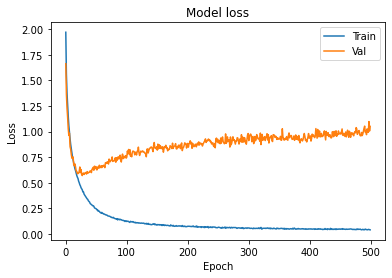

In [ ]:
 plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

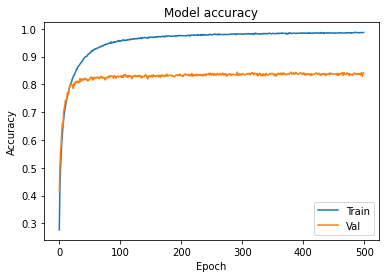

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]


313/313 [==============================] - 1s 3ms/step - loss: 1.1423 - accuracy: 0.8306


0.8306000232696533

In [ ]:
model.save('my_cifar10_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('my_cifar10_model.h5')

In [ ]:
my_image = plt.imread("/content/cat.jpg")


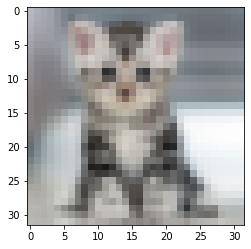

In [ ]:
from skimage.transform import resize

my_image_resized = resize(my_image,(32,32,3))
img = plt.imshow(my_image_resized)


In [ ]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [ ]:
probabilities

array([[4.29866131e-13, 6.65810910e-18, 8.41826520e-09, 9.96239305e-01,
        3.92492302e-06, 3.87361215e-05, 1.17513207e-10, 3.71806859e-03,
        1.02822515e-13, 2.58283232e-14]], dtype=float32)

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])
print("Most likely class:", number_to_class[index[4]], "-- Probability:", probabilities[0,index[4]])
print("Second most likely class:", number_to_class[index[3]], "-- Probability:", probabilities[0,index[3]])
print("Third most likely class:", number_to_class[index[2]], "-- Probability:", probabilities[0,index[2]])
print("Fourth most likely class:", number_to_class[index[1]], "-- Probability:", probabilities[0,index[1]])
print("Fifth most likely class:", number_to_class[index[0]], "-- Probability:", probabilities[0,index[0]])

Most likely class: cat -- Probability: 0.9962393
Second most likely class: horse -- Probability: 0.0037180686
Third most likely class: dog -- Probability: 3.873612e-05
Fourth most likely class: deer -- Probability: 3.924923e-06
Fifth most likely class: bird -- Probability: 8.418265e-09
Most likely class: frog -- Probability: 1.1751321e-10
Second most likely class: airplane -- Probability: 4.2986613e-13
Third most likely class: ship -- Probability: 1.02822515e-13
Fourth most likely class: truck -- Probability: 2.5828323e-14
Fifth most likely class: automobile -- Probability: 6.658109e-18
